<a href="https://colab.research.google.com/github/Thujaina/AI-programs/blob/main/ecg_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 91.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [3]:
!pip install seaborn

In [4]:
!pip install -U tensorflow scikeras imbalanced-learn

In [1]:
!pip install scikeras

In [2]:
from scikeras.wrappers import KerasClassifier

In [3]:
from sklearn.model_selection import KFold, cross_val_score

In [4]:
# Importing libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# deep learning libraries:
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.combine import SMOTEENN
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import KFold, cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
!ls /content/drive/MyDrive/datasets/ECG/


mitbih_test.csv  mitbih_train.csv


In [7]:
import pandas as pd

TRAIN_PATH = "/content/drive/MyDrive/datasets/ECG/mitbih_train.csv"
TEST_PATH  = "/content/drive/MyDrive/datasets/ECG/mitbih_test.csv"

train = pd.read_csv(TRAIN_PATH,header=None)
test  = pd.read_csv(TEST_PATH,header=None)

print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (87554, 188)
Test shape: (21892, 188)


In [7]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (87554, 188)
Test shape: (21892, 188)


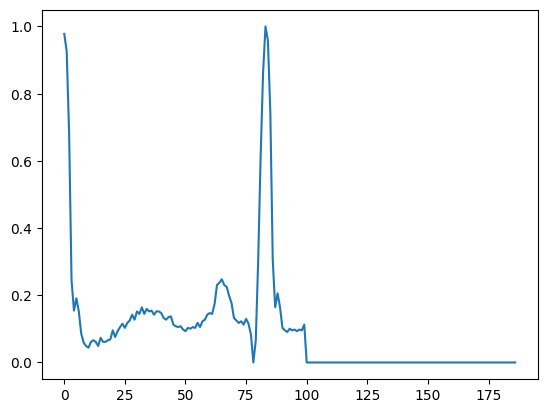

In [12]:
# Visualize the first row after excluding the last column (Class):
plt.plot(train.iloc[0, train.columns != 187])
plt.show()

In [13]:
# observing the number of subject per class:
train.iloc[:, -1].value_counts()

,count
187,
0.0,72471
4.0,6431
2.0,5788
1.0,2223
3.0,641


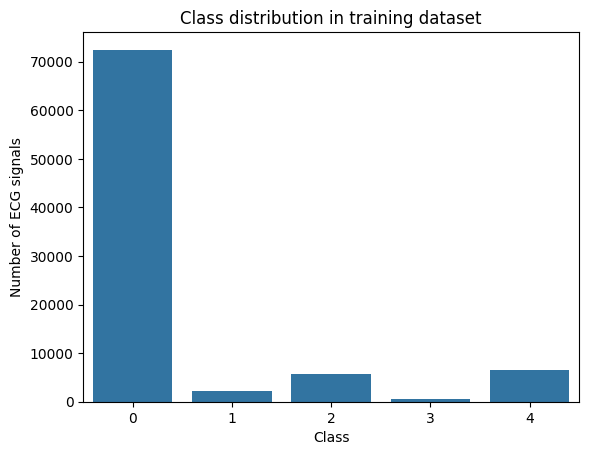

In [11]:
# Visualize the number of subjects in each class in the train dataset:
counts = train.iloc[:, -1].value_counts().sort_index()
classes = [0, 1, 2, 3, 4]
sns.barplot(x=classes, y=counts.values)
plt.xlabel("Class")
plt.ylabel("Number of ECG signals")
plt.title("Class distribution in training dataset")
plt.show()


In [26]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


from matplotlib import pyplot as plt
_df_32[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33[1].plot(kind='hist', bins=20, title=1)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34[2].plot(kind='hist', bins=20, title=2)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35[3].plot(kind='hist', bins=20, title=3)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36.plot(kind='scatter', x=0, y=1, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37.plot(kind='scatter', x=1, y=2, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38.plot(kind='scatter', x=2, y=3, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39.plot(kind='scatter', x=3, y=4, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[14]
  ys = series[0]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_40.sort_values(14, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(14)
_ = plt.ylabel(0)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[14]
  ys = series[1]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_41.sort_values(14, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(14)
_ = plt.ylabel(1)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[14]
  ys = series[2]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_42.sort_values(14, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(14)
_ = plt.ylabel(2)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[14]
  ys = series[3]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_43.sort_values(14, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(14)
_ = plt.ylabel(3)

from matplotlib import pyplot as plt
_df_44[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_45[1].plot(kind='line', figsize=(8, 4), title=1)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_46[2].plot(kind='line', figsize=(8, 4), title=2)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_47[3].plot(kind='line', figsize=(8, 4), title=3)
plt.gca().spines[['top', 'right']].set_visible(False)

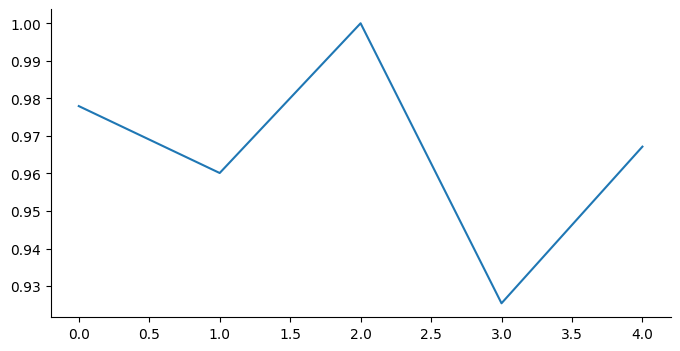

In [25]:
#values
from matplotlib import pyplot as plt
_df_12[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

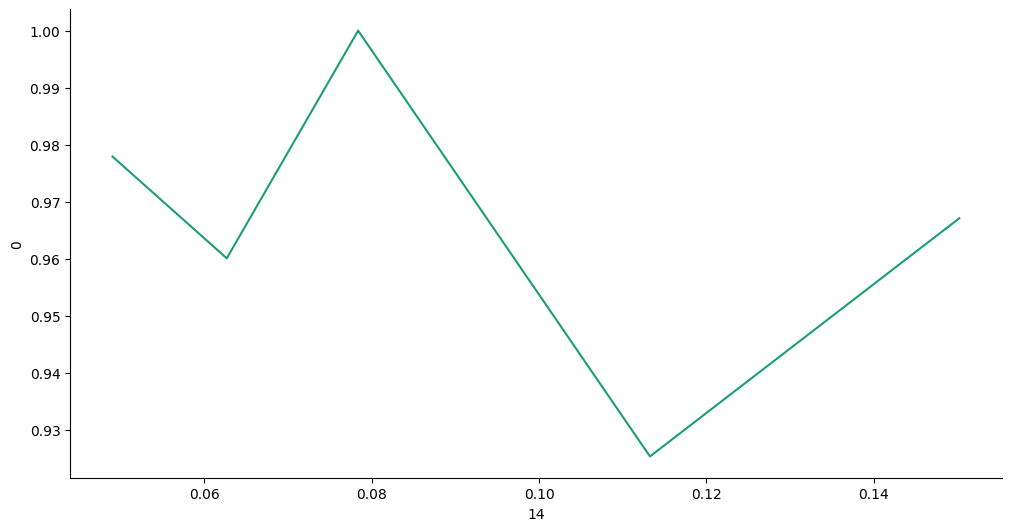

In [24]:
#time
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[14]
  ys = series[0]

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values(14, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(14)
_ = plt.ylabel(0)

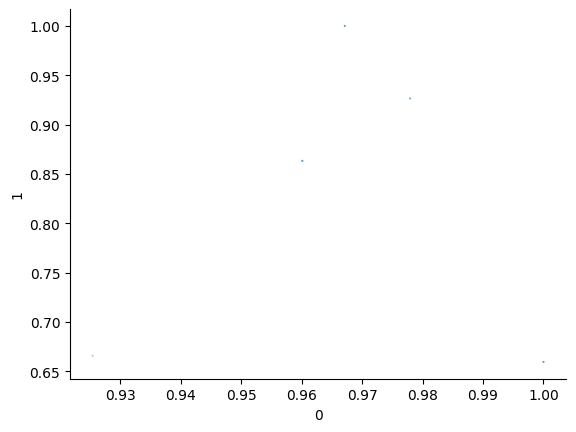

In [20]:
#2d distribution
from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x=0, y=1, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

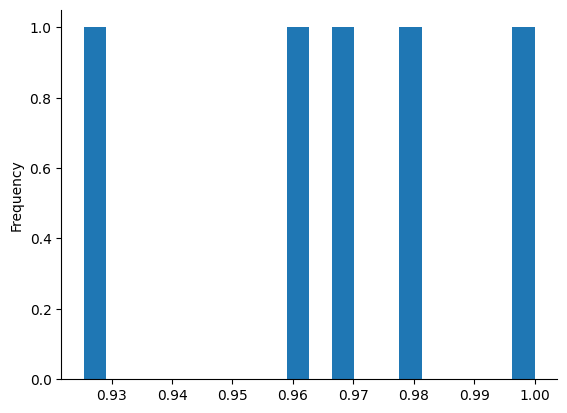

In [19]:
#distribution
from matplotlib import pyplot as plt
_df_0[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [27]:
# checking missing values:
train.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
183,0
184,0
185,0
186,0


In [28]:
test.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
183,0
184,0
185,0
186,0


In [8]:
# Splitting the data:
# creating X and y from train dataset:
#X_train = train.loc[:,train.columns !=187]
#y_train = train.loc[: , train.columns == 187]
X_train = train.iloc[:, :-1]   # columns 0–186
y_train = train.iloc[:, -1]    # column 187 as Series


In [9]:
# data balancing:....no need
#sme = SMOTEENN(random_state=42)...no need
#X_res, y_res = sme.fit_resample(X_train, y_train)...no need
# Train model without any balancing

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)


In [ ]:
# Add ENN in the next cell after SMOTE
from imblearn.under_sampling import EditedNearestNeighbours

enn = EditedNearestNeighbours(n_neighbors=3)
X_clean, y_clean = enn.fit_resample(X_sm, y_sm)
print("After ENN:", y_clean.value_counts())


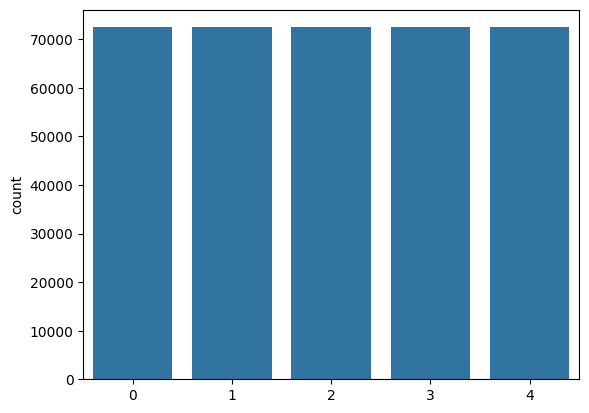

In [12]:
sns.barplot(x= classes, y=y_res.value_counts())
plt.show()

In [13]:
# creating Validation set from train set:
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2, random_state=0)


In [14]:
# creating X and y from test dataset:
X_test = test.loc[:,train.columns !=187]
y_test = test.loc[: , train.columns == 187]

In [15]:
def ann_model():
    model = Sequential()
    model.add(Dense(50, input_shape=(187,), activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [19]:
model = ann_model()
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20)


Epoch 1/20
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - accuracy: 0.8331 - loss: 0.4521 - val_accuracy: 0.9337 - val_loss: 0.1867
Epoch 2/20
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.9405 - loss: 0.1719 - val_accuracy: 0.9523 - val_loss: 0.1382
Epoch 3/20
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.9570 - loss: 0.1264 - val_accuracy: 0.9517 - val_loss: 0.1321
Epoch 4/20
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - accuracy: 0.9653 - loss: 0.1012 - val_accuracy: 0.9690 - val_loss: 0.0907
Epoch 5/20
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9705 - loss: 0.0881 - val_accuracy: 0.9737 - val_loss: 0.0793
Epoch 6/20
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.9745 - loss: 0.0775 - val_accuracy: 0.9759 - val_loss: 0.0718
Epoch 7/20
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.9768 - loss: 0.0696 - val_accuracy: 0.9784 - val_loss: 0.0663
Epoch 8/20
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - accuracy: 0.9783 - loss: 0

In [20]:
from sklearn.metrics import matthews_corrcoef
import numpy as np

y_pred = np.argmax(model.predict(X_val), axis=1)
mcc = matthews_corrcoef(y_val, y_pred)

print("Validation MCC:", mcc)


2265/2265 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Validation MCC: 0.9834356414834121


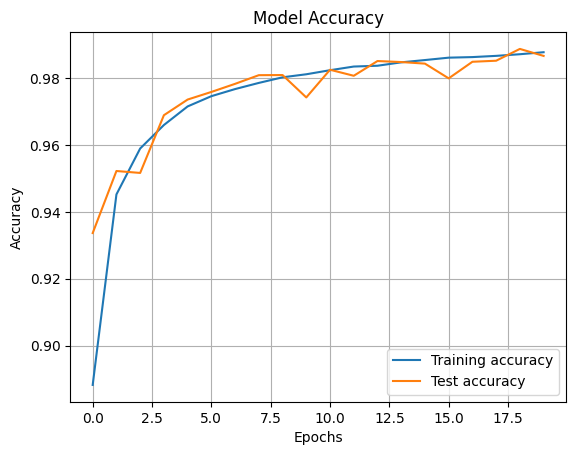

In [21]:
# Training and validation Accuracy:
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Test accuracy")
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()
plt.show()

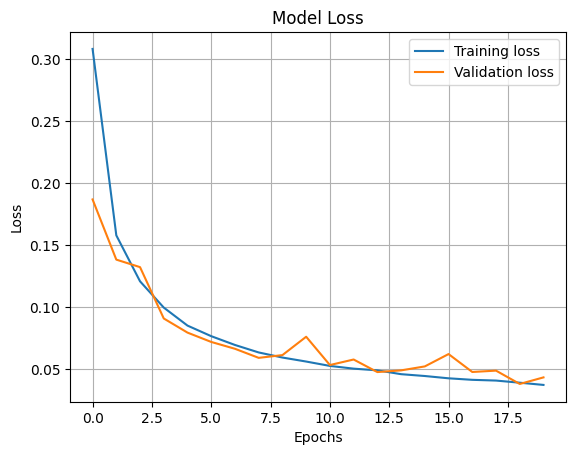

In [22]:
# Training and validation Loss:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()
plt.show()

In [23]:
# prediction for ANN model:
model_predictions = model.predict(X_test)
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Model Accuracy is {test_acc}')
print(f'Model Loss is {test_loss}')

685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9640 - loss: 0.1305
Model Accuracy is 0.9598940014839172
Model Loss is 0.1885295957326889


In [24]:
# Classification report:
print(classification_report(y_true=y_test, y_pred=np.argmax(model_predictions, axis=1)))

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     18118
         1.0       0.50      0.80      0.62       556
         2.0       0.92      0.93      0.93      1448
         3.0       0.67      0.82      0.73       162
         4.0       0.96      0.98      0.97      1608

    accuracy                           0.96     21892
   macro avg       0.81      0.90      0.84     21892
weighted avg       0.97      0.96      0.96     21892



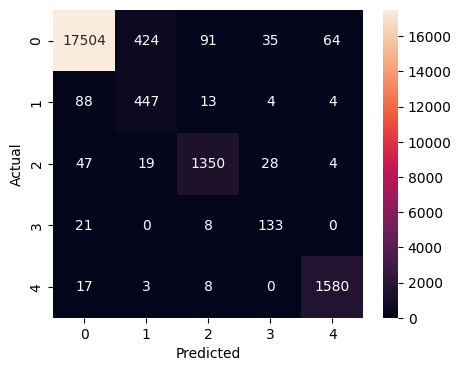

In [25]:
# Confusion Matrix:
cm = confusion_matrix(y_true=y_test, y_pred=np.argmax(model_predictions, axis=1))
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [52]:
!pip install scikit-learn==1.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 58.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn: filename=scikit_learn-1.2.2-cp312-cp312-linux_x86_64.whl size=9462199 sha256=73d69928383405518819de58bb4df31c887f5c594ce3e61942568f3be71c6865
  Stored in directory: /root/.cache/pip/wheels/24/f8/77/ae90c181b806f450a6fec8c8f794594e7c92fa79d7ca27e656
Successfully built scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikeras 0.13.0 requires scikit-learn>=1.4.2, but you have scikit-learn 1.2.2 which is incompatible.
spopt 0.7.0 require

In [26]:
# CROSS VALIDATION
# 1. Clear the results list
results = []

# 2. Define the estimator (Note: model= instead of build_fn=)
# Adding verbose=1 helps you see that it's actually moving!
estimator = KerasClassifier(model=ann_model, epochs=20, batch_size=64, verbose=1)

# 3. Define the fold
kfold = KFold(n_splits=4)

# 4. Run Cross Validation
cv_results = cross_val_score(estimator, X_train, y_train, cv=kfold)
results.append(cv_results)

print(f"Mean Accuracy: {cv_results.mean()}")

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [46]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[multiclass_mcc])


In [47]:
plt.plot(history.history['multiclass_mcc'], label="Training MCC")
plt.plot(history.history['val_multiclass_mcc'], label="Validation MCC")
plt.title('Model MCC')
plt.ylabel('MCC')
plt.xlabel('Epochs')
plt.grid()
plt.legend()
plt.show()


KeyError: 'multiclass_mcc'